#<h1>Mounting the Drive</h1>

In [74]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import required libraries and Dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [76]:
df = pd.read_csv("/content/drive/MyDrive/HR Analytics/train_LZdllcl.csv")

# The Dataset

In [77]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# Exploratory Data Analysis on our dataset

In [78]:
df.shape

(54808, 14)

In [79]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [80]:
df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [81]:
def barplot_count(column,x=5,y=5,df=df):
        
        plt.figure(figsize=(x,y))
        cnt_column = df[column].value_counts().to_dict()
        plt.title(column)
        plt.bar(cnt_column.keys(),cnt_column.values())

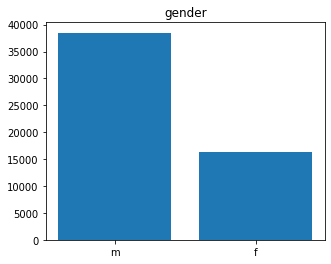

In [82]:
barplot_count('gender',5,4)

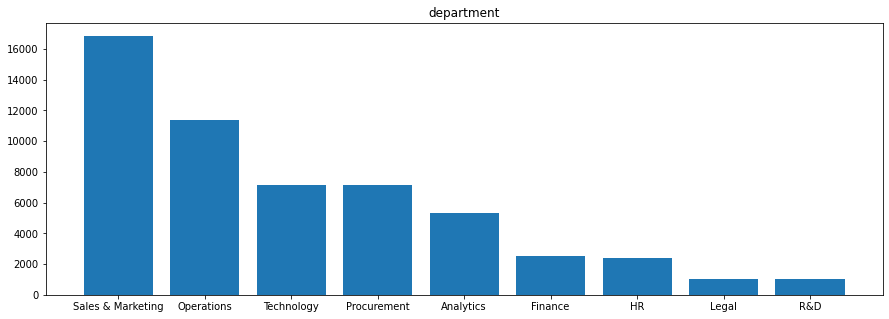

In [83]:
barplot_count('department',15,5)

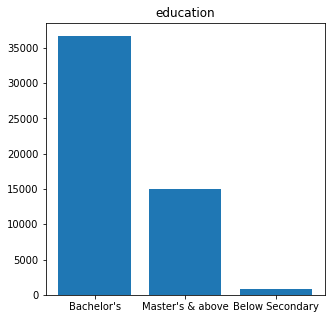

In [84]:
barplot_count('education')

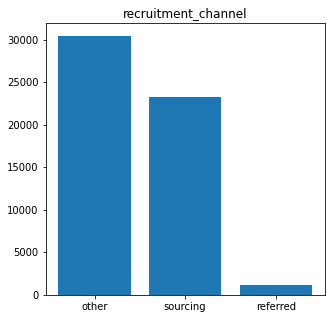

In [85]:
df.recruitment_channel.unique()
barplot_count('recruitment_channel')

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

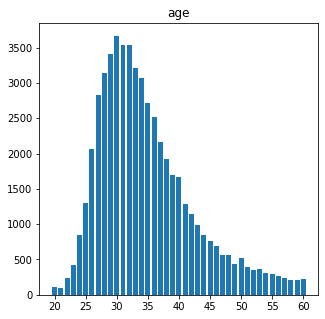

In [86]:
barplot_count('age')
df.age.describe()

In [87]:
agefrom25_40_in_percentage = (df.loc[ (df.age >= 25) & (df.age < 40)].shape[0])/df.shape[0]*100
agefrom25_40_in_percentage

74.38330170777988

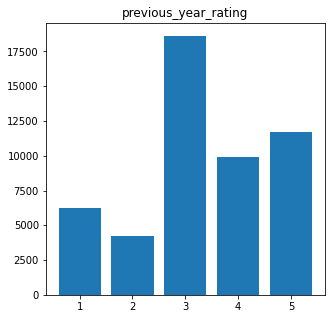

In [88]:
barplot_count('previous_year_rating')

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

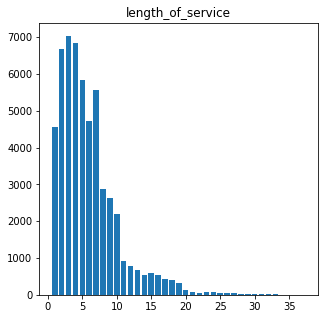

In [89]:
barplot_count('length_of_service')
df['length_of_service'].describe()

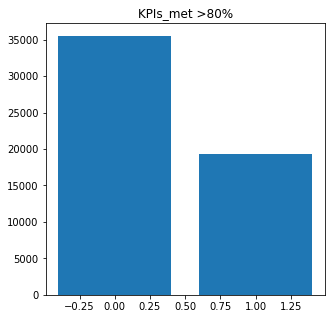

In [90]:
barplot_count('KPIs_met >80%')

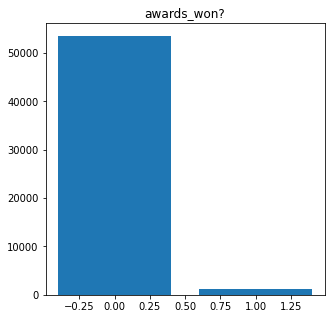

In [91]:
barplot_count('awards_won?')

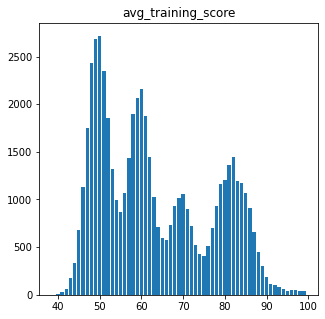

In [92]:
barplot_count('avg_training_score')

In [93]:
df['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98])

In [94]:
df['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [95]:
Total_promotedf = df.loc[df.is_promoted == 1]
Total_promoted = Total_promotedf.shape[0]
Total_promotedf.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,4668.000000,4668.000000,4668.000000,4329.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.0
mean,39285.092331,1.203299,34.372965,3.986140,5.716367,0.698800,0.119751,71.325193,1.0
std,22754.632174,0.513805,7.081449,1.052149,4.007772,0.458828,0.324706,14.746122,0.0
min,39.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,1.0
25%,19390.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,59.000000,1.0
50%,39439.500000,1.000000,33.000000,4.000000,5.000000,1.000000,0.000000,71.000000,1.0
75%,59082.250000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,84.000000,1.0
max,78292.000000,6.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.0


In [96]:

FullDataATSMedian = df.avg_training_score.quantile(.50)
LessmedianPromoted=Total_promotedf.loc[Total_promotedf.avg_training_score < FullDataATSMedian]
Lmp=(LessmedianPromoted.shape[0]/Total_promoted)*100
Lmp

26.028277634961437

In [97]:
Hmp = 100.0 - Lmp
Hmp

73.97172236503856

**Hence if Employee has high training score, chances for him to be promoted is 73%**

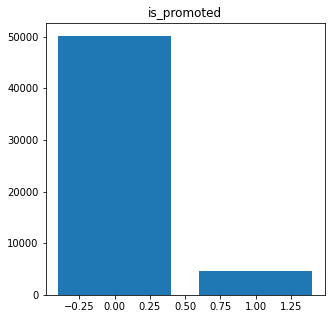

In [98]:
barplot_count('is_promoted')

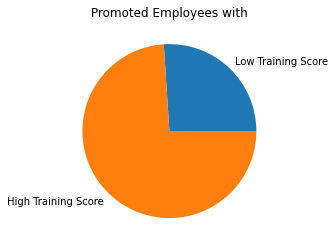

In [99]:
Pie_dict={'Low Training Score':Lmp, 'High Training Score':Hmp}
plt.title('Promoted Employees with')
plt.pie([Lmp, Hmp], labels=Pie_dict.keys())
plt.show()

In [100]:
EmployeeWithAwards = Total_promotedf.loc[Total_promotedf['awards_won?'] == 1].shape[0]

In [101]:
PEmpPromoplusAwards = (EmployeeWithAwards/Total_promoted)*100
PEmpPromoplusAwards

11.975149957155098

In [102]:
PromoWithKpi = Total_promotedf.loc[Total_promotedf['KPIs_met >80%'] == 1].shape[0]

In [103]:
PpromoWithKpi=(PromoWithKpi/Total_promoted)*100
PpromoWithKpi

69.88003427592116

In [104]:

FullDataLOSMedian = df.length_of_service.median()
LOSmorethan7 = Total_promotedf.loc[Total_promotedf.length_of_service > FullDataLOSMedian ].shape[0]

In [105]:
PpromoWithLOS7 =(LOSmorethan7/Total_promoted)*100
PpromoWithLOS7

43.14481576692374

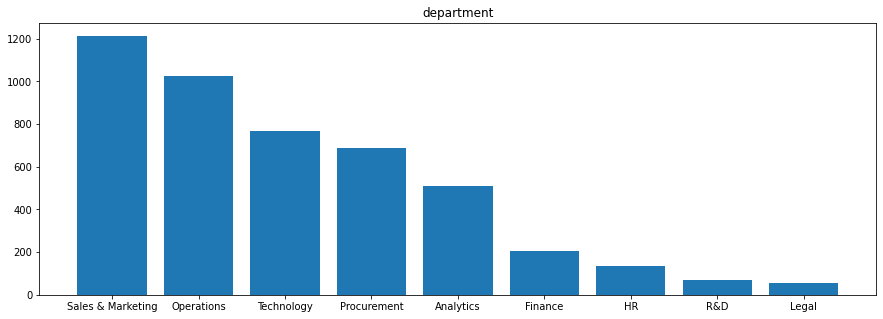

In [106]:
barplot_count('department',15,5, df=Total_promotedf)

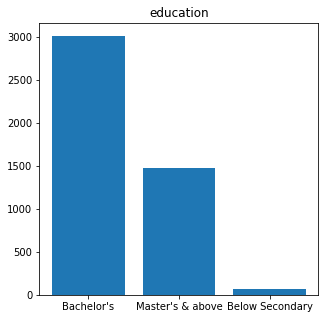

In [107]:
barplot_count('education', df=Total_promotedf)

In [108]:
AllBachelor=df.loc[df.education == "Bachelor's" ].shape[0]
PromotedBachelor=Total_promotedf.loc[Total_promotedf.education == "Bachelor's" ].shape[0]
ShareofBachelor=(PromotedBachelor/AllBachelor)*100
ShareofBachelor

8.20311434726881

In [109]:
AllMasters=df.loc[df.education == "Master's & above" ].shape[0]
PromotedMasters=Total_promotedf.loc[Total_promotedf.education == "Master's & above" ].shape[0]
ShareofMasters=(PromotedMasters/AllMasters)*100
ShareofMasters

9.855946398659967

**Master's have higher chances of getting promoted!**

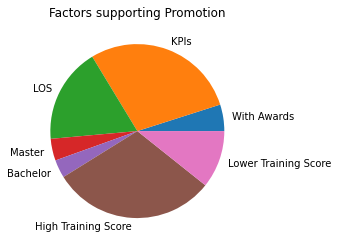

In [110]:
plt.title("Factors supporting Promotion")
plt.pie([
PEmpPromoplusAwards,
PpromoWithKpi,
PpromoWithLOS7,
ShareofMasters, 
ShareofBachelor, Hmp, Lmp
],labels=['With Awards','KPIs','LOS','Master','Bachelor','High Training Score','Lower Training Score'])
plt.show()

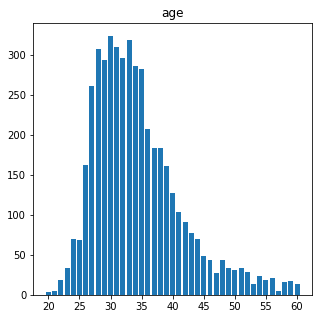

In [111]:
barplot_count('age', df=Total_promotedf)

**Age between 26 to 38 are have seen more promotion**

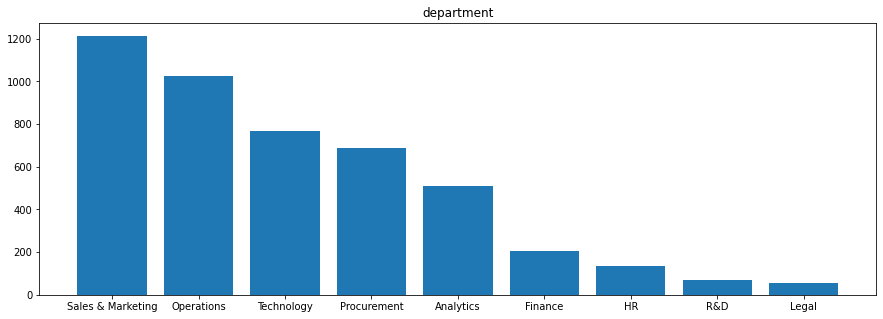

In [112]:
barplot_count('department',x=15,y=5,df=Total_promotedf)

In [113]:
Lis=[]

for i in df.department.unique():
  Dpt=df.loc[df.department == i ].shape[0]
  PromotedDPT=Total_promotedf.loc[Total_promotedf.department == i ].shape[0]
  ShareofDPT=(PromotedDPT/Dpt)*100
  Lis.append(ShareofDPT)
Gg = {'Department':df.department.unique(),
'Share':Lis}
pd.DataFrame(Gg,index=range(len(Lis)))

,Department,Share
0,Sales & Marketing,7.203088
1,Operations,9.014804
2,Technology,10.759316
3,Analytics,9.566517
4,R&D,6.906907
5,Procurement,9.638554
6,Finance,8.123028
7,HR,5.624483
8,Legal,5.101059


<BarContainer object of 9 artists>

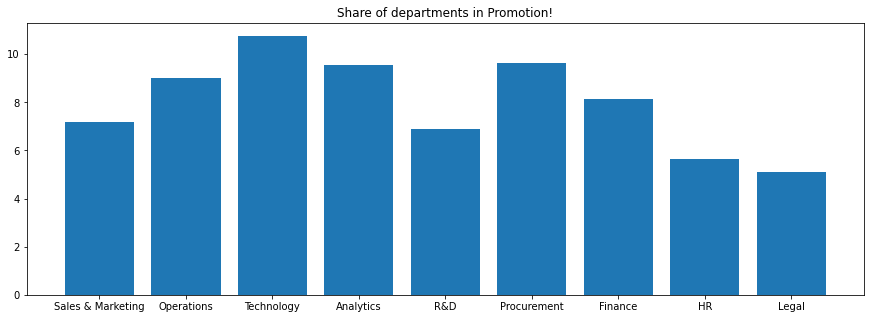

In [114]:
plt.figure(figsize=(15,5))
plt.title("Share of departments in Promotion!")
plt.bar(df.department.unique(),Lis)

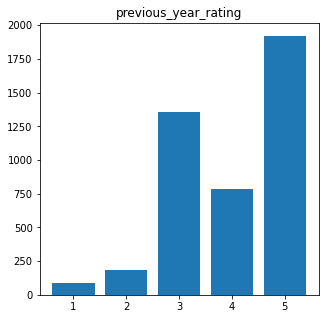

In [115]:
barplot_count('previous_year_rating',df=Total_promotedf)

**Employees with previous year rating of 5 have highest chances of getting promoted, which is quite obvious!**

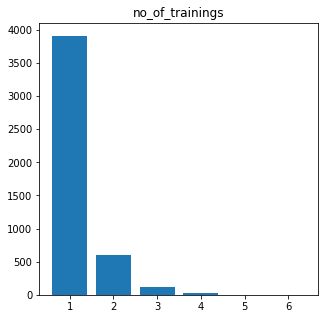

In [116]:
barplot_count('no_of_trainings',df=Total_promotedf)

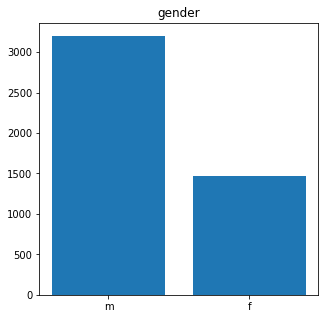

In [117]:
barplot_count('gender',df=Total_promotedf)

In [118]:
Allgender=df.loc[df.gender == "m" ].shape[0]
PromotedGenders=Total_promotedf.loc[Total_promotedf.gender== "m" ].shape[0]
ShareofMales=(PromotedGenders/Allgender)*100
ShareofMales

8.315149625935161

In [119]:
Allgender=df.loc[df.gender == "f" ].shape[0]
PromotedGenders=Total_promotedf.loc[Total_promotedf.gender== "f" ].shape[0]
ShareofFemales=(PromotedGenders/Allgender)*100
ShareofFemales

8.993379107405591

In [120]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [121]:
Total_promotedf.recruitment_channel.value_counts()

other       2556
sourcing    1974
referred     138
Name: recruitment_channel, dtype: int64

# <h1>Model Building</h1>

We will approach model building in following steps!
<ul>
  <li>Feature Engineering the dataset</li>
  <li>Hyper Parameter Optimization</li>
  <li>train the model</li>
  <li>Prediction</li>
  <li>Check the Score</li>
</ul>

In [122]:
import lightgbm as lgb

In [123]:
testfile = pd.read_csv("/content/drive/MyDrive/HR Analytics/test_2umaH9m.csv")
testfile

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [148]:
test_id = testfile.employee_id

In [124]:
df2 = pd.concat([df,testfile])
df2.shape
df2.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

<h1>Featuring Engineering the Dataset</h1>
With Reference to : https://www.kaggle.com/code/mustafacicek/hr-analytics-analyticsvidhya-8th-place-0-5329-f1/notebook

In [125]:
df3 = df2.copy()

In [126]:
df2

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [127]:
df3['is_firstyear'] = df3['length_of_service'].apply(lambda x : 1 if x == 1 else 0 )
df3['starting_age'] = df3['age'] - df3['length_of_service']
df3['total_success'] = df3['previous_year_rating']*20 + df3['awards_won?']*100 + df3['avg_training_score'] + df3['KPIs_met >80%']*100

Let's analyse other features with respect to Region and Department

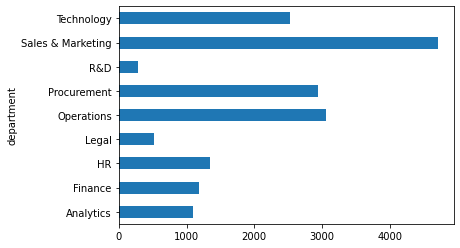

In [128]:
rd1 = df3.groupby(["region",	"department"])['employee_id'].count()
rd1.region_2.plot(kind='barh')

In [129]:
rd2 = df3.groupby(["region","department"])['age'].mean()
rd3 = df3.groupby(["region","department"])['length_of_service'].mean()
rd4 = df3.groupby(["region","department"])['avg_training_score'].mean()
rd5 = df3.groupby(["region","department"])['total_success'].mean()
rd6 = df3.groupby(["region","department"])['previous_year_rating'].mean()
rd7 = df3.groupby(["region","department"])['is_firstyear'].sum()

In [130]:
for i in range(rd1.shape[0]):
  region = rd1.index[i][0]
  department = rd1.index[i][1]

  df3.loc[(df3.region == region) & (df3.department == department),"employee_per_department&region"] = rd1[i]
  df3.loc[(df3.region == region) & (df3.department == department),"avg_age_for_department&region"] = rd2[i]
  df3.loc[(df3.region == region) & (df3.department == department),"avg_score_for_department&region"] = rd3[i]
  df3.loc[(df3.region == region) & (df3.department == department),"avg_succes_department&region"] = rd4[i]
  df3.loc[(df3.region == region) & (df3.department == department),"avg_prev_year_rating_department&region"] = rd5[i]
  df3.loc[(df3.region == region) & (df3.department == department),"avg_len_of_service_department&region"] = rd6[i]
  df3.loc[(df3.region == region) & (df3.department == department),"total_rookie_for_department&region"] = rd7[i]





In [131]:
df3["is_young_in_dep_reg"] = np.where((df3.age <= df3["avg_age_for_department&region"]),1,0)
df3["better_score_in_dep_reg"] = np.where((df3.avg_training_score >= df3["avg_succes_department&region"] ),1,0)
df3["better_success_in_dep_reg"] = np.where((df3.total_success >= df3['avg_succes_department&region']),1,0)
df3["better_prev_year_rating_in_dep_reg"] = np.where((df3.previous_year_rating >= df3['avg_prev_year_rating_department&region']),1,0)
df3["longer_len_of_service_rating_in_dep_reg"] = np.where((df3.length_of_service >= df3['avg_len_of_service_department&region']),1,0)

Department level Feature Engineering!

In [132]:
d1 = df3.groupby("department")["employee_id"].count()
d2 = df3.groupby("department")["age"].mean()
d3 = df3.groupby("department")["avg_training_score"].mean()
d4 = df3.groupby("department")["total_success"].mean()
d5 = df3.groupby("department")["previous_year_rating"].mean()
d6 = df3.groupby("department")["length_of_service"].mean()
d7 = df3.groupby("department")["is_firstyear"].sum()


for i in range(d1.shape[0]):
    department = d1.index[i]

    df3.loc[(df2.department == department), "employee_per_department"] = d1[i]
    df3.loc[(df2.department == department), "avg_age_for_department"] = d2[i]
    df3.loc[(df2.department == department), "avg_score_for_department"] = d3[i]
    df3.loc[(df2.department == department), "avg_succes_department"] = d4[i]
    df3.loc[(df2.department == department), "avg_prev_year_rating_department"] = d5[i]
    df3.loc[(df2.department == department), "avg_len_of_service_department"] = d6[i]
    df3.loc[(df2.department == department), "total_rookie_for_department"] = d7[i] 

In [133]:
df3["is_young_in_dep"] = np.where((df3.age <= df3["avg_age_for_department"]), 0, 1)
df3["better_score_in_dep"] = np.where((df3["avg_score_for_department"] <= df3["avg_training_score"]), 1, 0)
df3["better_success_in_dep"] = np.where((df3["avg_succes_department"] <= df3["total_success"]), 1, 0)
df3["better_prev_year_rating_in_dep"] = np.where((df3["avg_prev_year_rating_department"] <= df3["previous_year_rating"]), 1, 0)
df3["longer_len_of_service_rating_in_dep"] = np.where((df3["avg_len_of_service_department"] <= df3["length_of_service"]), 1, 0)

In [134]:
#Label Encoding
df3["education"] = df3["education"].map({"Below Secondary": 1, "Bachelor's": 2, "Master's & above":3})

In [135]:
df3["total_training_score"] = df3["no_of_trainings"] * df3["avg_training_score"]
df3["total_training_score"].describe()

count    78298.000000
mean        79.759853
std         43.799629
min         39.000000
25%         53.000000
50%         64.000000
75%         84.000000
max        710.000000
Name: total_training_score, dtype: float64

<h2>Target Encoding</h2>

In [136]:
#https://maxhalford.github.io/blog/target-encoding/
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

df3["region"] = calc_smooth_mean(df3, "region", "is_promoted", 300)
df3["department"] = calc_smooth_mean(df3, "department", "is_promoted", 300)

In [137]:
dummies = pd.get_dummies(df3[["gender", "recruitment_channel"]], drop_first = True)

df4 = pd.concat([df3, dummies], axis = 1).drop(["gender", "recruitment_channel"], axis = 1)
df4

,employee_id,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,total_rookie_for_department,is_young_in_dep,better_score_in_dep,better_success_in_dep,better_prev_year_rating_in_dep,longer_len_of_service_rating_in_dep,total_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.072261,0.105299,3.0,1,35,5.0,8,1,0,...,2096.0,1,0,1,1,1,49,0,0,1
1,65141,0.090020,0.112894,2.0,1,30,5.0,4,0,0,...,914.0,0,0,0,1,0,60,1,0,0
2,7513,0.072261,0.066909,2.0,1,34,3.0,7,0,0,...,2096.0,0,0,0,0,1,50,1,0,1
3,2542,0.072261,0.110204,2.0,2,39,1.0,10,0,0,...,2096.0,1,0,0,0,1,100,1,0,0
4,48945,0.106689,0.065840,2.0,1,45,3.0,2,0,0,...,881.0,1,0,0,0,0,73,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,0.058664,0.080246,1.0,1,24,3.0,1,0,0,...,256.0,0,1,0,0,0,61,1,0,1
23486,25600,0.106689,0.114880,2.0,1,31,3.0,7,0,0,...,881.0,0,0,0,0,1,74,1,0,1
23487,45409,0.059437,0.072267,2.0,1,26,4.0,4,0,0,...,377.0,0,0,0,1,0,50,0,0,1
23488,1186,0.095933,0.060649,2.0,3,27,NaN,1,0,0,...,666.0,0,0,0,0,0,210,1,0,1


In [138]:
train = df4[df4.is_promoted.notnull()]
test = df4[df4.is_promoted.isnull()]

target = "is_promoted"
predictors = [x for x in train.columns if x not in ["employee_id", "is_promoted"]]

In [139]:
train

,employee_id,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,total_rookie_for_department,is_young_in_dep,better_score_in_dep,better_success_in_dep,better_prev_year_rating_in_dep,longer_len_of_service_rating_in_dep,total_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.072261,0.105299,3.0,1,35,5.0,8,1,0,...,2096.0,1,0,1,1,1,49,0,0,1
1,65141,0.090020,0.112894,2.0,1,30,5.0,4,0,0,...,914.0,0,0,0,1,0,60,1,0,0
2,7513,0.072261,0.066909,2.0,1,34,3.0,7,0,0,...,2096.0,0,0,0,0,1,50,1,0,1
3,2542,0.072261,0.110204,2.0,2,39,1.0,10,0,0,...,2096.0,1,0,0,0,1,100,1,0,0
4,48945,0.106689,0.065840,2.0,1,45,3.0,2,0,0,...,881.0,1,0,0,0,0,73,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,0.106689,0.077685,2.0,1,48,3.0,17,0,0,...,881.0,1,0,0,0,1,78,1,0,1
54804,74592,0.090020,0.079914,3.0,1,37,2.0,6,0,0,...,914.0,1,0,0,0,0,56,0,0,0
54805,13918,0.095108,0.091814,2.0,1,27,5.0,3,1,0,...,777.0,0,0,1,1,0,79,1,0,0
54806,13614,0.072261,0.046599,NaN,1,29,1.0,2,0,0,...,2096.0,0,0,0,0,0,45,1,0,1


In [140]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

In [141]:
f1_scorer = make_scorer(f1_score)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(train[predictors], train[target], 
                                                    test_size = 0.2, 
                                                    stratify = train[target], 
                                                    random_state = 42)

<h1>Hyper Parameter Optimization</h1>

In [142]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [143]:
# def objective(params):
#     params = {
#         'max_depth': int(params['max_depth']),
#         'num_leaves': int(params['num_leaves']),
#         'min_child_samples': int(params['min_child_samples']),
#         'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
#         'subsample': '{:.3f}'.format(params['subsample']),
#         'min_split_gain': '{:.3f}'.format(params['min_split_gain']),
#         'scale_pos_weight': '{:.3f}'.format(params['scale_pos_weight']),
#         'reg_alpha': '{:.3f}'.format(params['reg_alpha']),
#         'reg_lambda': '{:.3f}'.format(params['reg_lambda']),
#     }
    
#     clf = lgb.LGBMClassifier(
#         n_estimators = 500,
#         learning_rate = 0.1,
#         n_jobs = -1,
#         random_state = 42,
#         **params
#     )
    
#     score = cross_val_score(clf, X_train.values, y_train.values, scoring = f1_scorer, cv = skf).mean()
#     print("F1-score {:.3f} params {}".format(score, params))
#     return -score

# space = {
#     "max_depth": hp.quniform('max_depth', 3, 10, 1),
#     'num_leaves': hp.quniform('num_leaves', 20, 100, 10),
#     'min_child_samples': hp.quniform('min_child_samples', 50, 150, 10),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
#     'subsample': hp.uniform('subsample', 0.3, 1.0),
#     'min_split_gain': hp.uniform('min_split_gain', 0, 0.5),
#     'scale_pos_weight': hp.uniform('scale_pos_weight', 2, 4),
#     'reg_alpha': hp.uniform('reg_alpha', 0, 5),
#     'reg_lambda': hp.uniform('reg_lambda', 0, 1),

# }
# rstate = np.random.RandomState(42)
# best = fmin(fn = objective,
#             space = space,
#             algo = tpe.suggest,
#             max_evals = 150,
#             rstate = rstate)

F1-score 0.501 params {'max_depth': 4, 'num_leaves': 60, 'min_child_samples': 70, 'colsample_bytree': '0.423', 'subsample': '0.618', 'min_split_gain': '0.149', 'scale_pos_weight': '3.665', 'reg_alpha': '1.597', 'reg_lambda': '0.069'}
F1-score 0.502 params {'max_depth': 8, 'num_leaves': 70, 'min_child_samples': 90, 'colsample_bytree': '0.513', 'subsample': '0.587', 'min_split_gain': '0.207', 'scale_pos_weight': '3.455', 'reg_alpha': '1.579', 'reg_lambda': '0.933'}
F1-score 0.493 params {'max_depth': 5, 'num_leaves': 90, 'min_child_samples': 60, 'colsample_bytree': '0.745', 'subsample': '0.886', 'min_split_gain': '0.031', 'scale_pos_weight': '3.767', 'reg_alpha': '4.756', 'reg_lambda': '0.303'}
F1-score 0.495 params {'max_depth': 8, 'num_leaves': 40, 'min_child_samples': 70, 'colsample_bytree': '0.690', 'subsample': '0.611', 'min_split_gain': '0.227', 'scale_pos_weight': '3.837', 'reg_alpha': '2.167', 'reg_lambda': '0.105'}
F1-score 0.509 params {'max_depth': 9, 'num_leaves': 60, 'min_ch

In [144]:
# best

{'colsample_bytree': 0.6737171291603058,
 'max_depth': 5.0,
 'min_child_samples': 150.0,
 'min_split_gain': 0.28239372805140245,
 'num_leaves': 70.0,
 'reg_alpha': 4.036072453453611,
 'reg_lambda': 0.6791763158662502,
 'scale_pos_weight': 2.478283752108534,
 'subsample': 0.37937752231315897}

In [143]:
{'colsample_bytree': 0.6737171291603058,
 'max_depth': 5.0,
 'min_child_samples': 150.0,
 'min_split_gain': 0.28239372805140245,
 'num_leaves': 70.0,
 'reg_alpha': 4.036072453453611,
 'reg_lambda': 0.6791763158662502,
 'scale_pos_weight': 2.478283752108534,
 'subsample': 0.37937752231315897}

In [145]:
def lgb_f1_score(y_true, y_pred):
    y_pred = np.round(y_pred)
    return ('F1', f1_score(y_true, y_pred), True)

In [151]:
clf = lgb.LGBMClassifier(n_estimators = 500, learning_rate = 0.1, n_jobs = -1,random_state = 42, 
                         colsample_bytree = 0.6737171291603058, max_depth = 5, min_child_samples = 150,
                         num_leaves = 70, scale_pos_weight = 2.478283752108534, 
                         subsample = 0.37937752231315897, min_split_gain = 0.07133977130970143, 
                         reg_alpha = 4.036072453453611, reg_lambda = 0.6791763158662502,boosting_type='dart')

In [153]:
clf.fit(train[predictors], train[target],
        eval_set = [(train[predictors], train[target])], 
        eval_metric = lgb_f1_score, 
        
        verbose=500)

[500]	valid_0's binary_logloss: 0.181407	valid_0's F1: 0.550247


LGBMClassifier(boosting_type='dart', colsample_bytree=0.6737171291603058,
               max_depth=5, min_child_samples=150,
               min_split_gain=0.07133977130970143, n_estimators=500,
               num_leaves=70, random_state=42, reg_alpha=4.036072453453611,
               reg_lambda=0.6791763158662502,
               scale_pos_weight=2.478283752108534,
               subsample=0.37937752231315897)

<h1>Prediction</h1>

In [154]:
y_pred = clf.predict(test[predictors])
preds = [int(round(x)) for x in y_pred]

# Saving the Submission file

In [155]:
sub=pd.DataFrame({"employee_id": test_id, "is_promoted": preds})

sub.to_csv("final_sub1.csv", index=False)